In [1]:
import pandas as pd 
import numpy as np 

In [12]:
"""
*CROSS VALIDATION - random_state determines how data is going to be split between training / test. 
his effects the accuracy of the model 
*For example: the way data was split would determine the accuracy result, therefore it would make sense to split the data 
in different ways, calculate accuracy and then take a mean of the scores - this is in essence KFOLD CROSS VALIDATION
and then taking a mean figure of accuracy.
*Examples from both Classification & Regression
"""

'\n*CROSS VALIDATION - random_state determines how data is going to be split between training / test. \nhis effects the accuracy of the model \n*For example: the way data was split would determine the accuracy result, therefore it would make sense to split the data \nin different ways, calculate accuracy and then take a mean of the scores - this is in essence KFOLD CROSS VALIDATION\nand then taking a mean figure of accuracy.\n*Examples from both Classification & Regression\n'

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X.shape
y.shape

(150,)

In [7]:
#import cross validation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #instatiate the knn object

In [8]:
#knn object: the entire feature matrix and response vector;  
#folds: classification scoring method
#note cv = 10 means fold 10 used (recommended)
#note the entire X & y dataset is being used. 
#The folds split the feature/response data equally - data is also stratified, i.e. the responses are equally distributed

In [9]:
#accuracy below for each of the 10 folds (cv = 10)
scores = cross_val_score(knn,X,y,cv = 10, scoring = 'accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [13]:
#now we shall take mean of the 10 accuracy metrics 
scores.mean()

0.9666666666666668

In [14]:
#now calculate the mean score for a range ks for knn, i.e. 1 - 30
k_range = {}
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X,y,cv = 10, scoring = 'accuracy')
    scores = scores.mean()
    k_range[i] = scores
    
print(k_range)

{1: 0.96, 2: 0.9533333333333334, 3: 0.9666666666666666, 4: 0.9666666666666666, 5: 0.9666666666666668, 6: 0.9666666666666668, 7: 0.9666666666666668, 8: 0.9666666666666668, 9: 0.9733333333333334, 10: 0.9666666666666668, 11: 0.9666666666666668, 12: 0.9733333333333334, 13: 0.9800000000000001, 14: 0.9733333333333334, 15: 0.9733333333333334, 16: 0.9733333333333334, 17: 0.9733333333333334, 18: 0.9800000000000001, 19: 0.9733333333333334, 20: 0.9800000000000001, 21: 0.9666666666666666, 22: 0.9666666666666666, 23: 0.9733333333333334, 24: 0.96, 25: 0.9666666666666666, 26: 0.96, 27: 0.9666666666666666, 28: 0.9533333333333334, 29: 0.9533333333333334, 30: 0.9533333333333334}


In [17]:
#now visualise the accuracy results 
import matplotlib.pyplot as plt
%matplotlib inline

'\n*k values 13,18 & 20 deliver the most accurate results. *However, in order to choose a low complexity model which can acccomodate out of sample data \nit is best to choose a higher k value (20) from the high accuracy range - example of bias-variance trade off\n(low k = low bias high variance\n high k high bias low variance)\n'

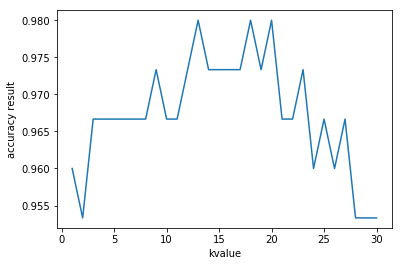

In [21]:
plt.plot(list(k_range.keys()),list(k_range.values()))
plt.xlabel('kvalue')
plt.ylabel('accuracy result')
"""
*k values 13,18 & 20 deliver the most accurate results. \
*However, in order to choose a low complexity model which can acccomodate out of sample data 
it is best to choose a higher k value (20) from the high accuracy range - example of bias-variance trade off
(low k = low bias high variance
 high k high bias low variance)
"""

In [24]:
#lets compare knn = 20 model with logistic regression 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
scores = cross_val_score(lr,X,y,cv = 10,scoring = 'accuracy').mean()
print(scores)
#knn better model with higher accuracy at k = 20

0.9533333333333334


C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\q

In [25]:
#lets apply kfold cv to linear regression

In [29]:
data = pd.read_csv('C:\\Users\\qraza\\OneDrive for Business\\Personal\\Python\\ML\\Advertising.csv', index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
from sklearn.linear_model import LinearRegression

feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]
y = data.sales

In [40]:
lin_r = LinearRegression()
scores = cross_val_score(lin_r, X,y,cv=10,scoring = 'neg_mean_squared_error')
mse = -scores
mse
#note mse gives a negative score hence the need to add '-' for positive results

array([3.38264572, 3.28736055, 2.09185507, 2.81784389, 1.27311083,
       1.74391853, 8.0006111 , 2.07650936, 3.03635301, 2.4289835 ])

In [41]:
rmse = np.sqrt(mse)
rmse
print(rmse.mean()) #error of 1.69

1.6796748419090766


In [45]:
#now lets remove newspaper as it does NOT have a linear relationship with sales (see LinearRegression 4.0.ipynb)
#removing newspaper improves accuracy as seen below
feature_cols = ['TV','radio']
X = data[feature_cols]
y = data.sales
lin_r = LinearRegression()
print(np.sqrt(-cross_val_score(lin_r, X,y,cv=10,scoring = 'neg_mean_squared_error').mean()))

1.7360642717193593


In [46]:
#kfold better for accuracy but slower than cross-val
#alternatively, we could create a hold out set where cross-val fold is not applied 
#and use the hold-out to test the accuracy of the model. Kind a mixture of test/train and CV.